## 2.9 爬虫常用类库4：Selenium操纵浏览器

### 2.9.1 安装Selenium

In [1]:
! pip3 install selenium

### 2.9.2 Selenium的基本使用方法

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome()
driver.maximize_window()
driver.get('https://cn.bing.com')
q = driver.find_element(by=By.ID, value='sb_form_q')
q.send_keys("selenium")
q.send_keys(Keys.ENTER)
# driver.find_element(by=By.ID, value='sb_form_go').click()
time.sleep(10)
driver.quit()

### 2.9.3 Selenium Webdriver的原理

通过前面的例子，本小节简单介绍Selenium的运行原理。我们将2.9.2小节的代码运行分成3部分：　
- 浏览器　
- driver　
- client
  
client就是我们写的代码，我们无须知道浏览器具体的运行原理，只需要调用driver，而driver知道如何驱动浏览器运行。  
在Selenium启动以后，driver其实充当了HTTP Server服务器的角色，负责client和浏览器通信。  
client根据Webdriver协议发送请求给driver，driver解析请求后，在浏览器上执行相应的操作，并把执行结果返回给client。其中Webdriver协议包含几乎所有与浏览器的交互操作。  
通过这些协议，client就可以通知driver执行哪些操作。

### 2.9.4 Selenium中的元素定位方法

### 2.9.5 Selenium Webdriver基本操作

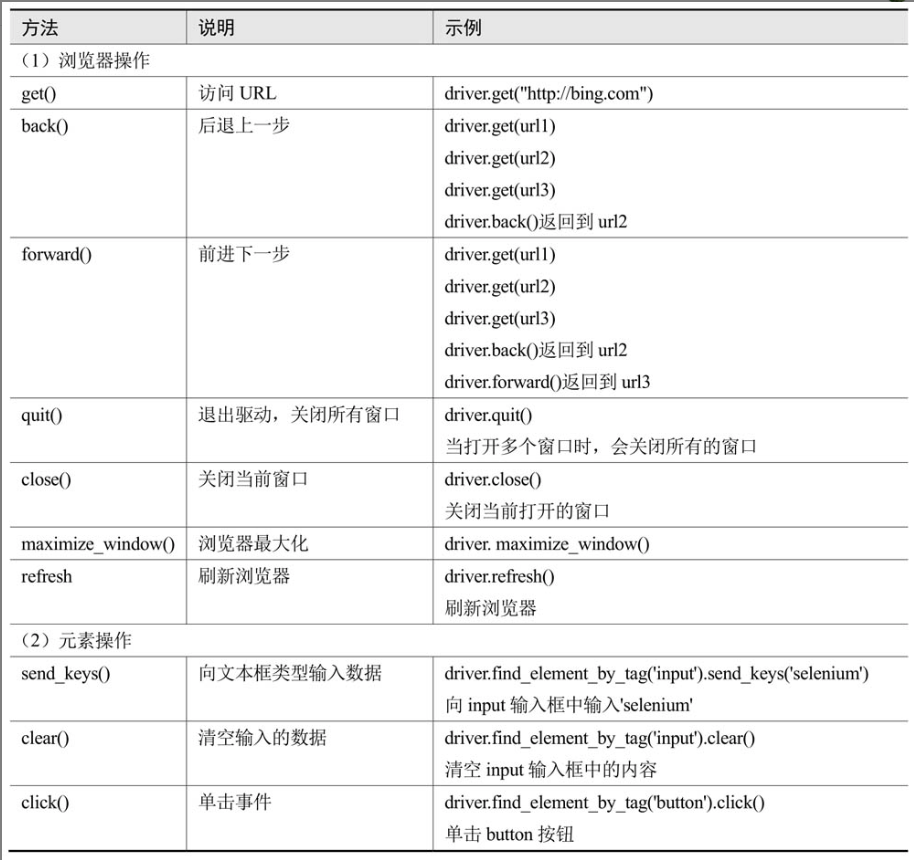
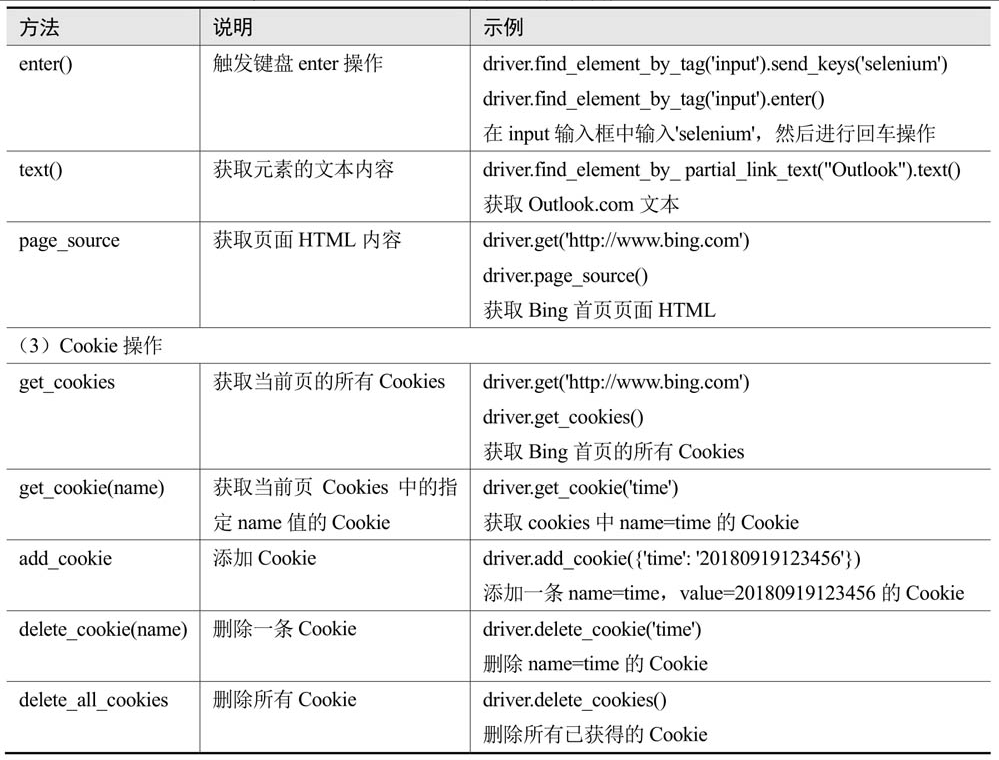

### 2.9.6 Selenium实战：抓取拉钩网招聘信息

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

class Lagou:
    def __init__(self) -> None:
        # 定义浏览器驱动
        self.driver = webdriver.Chrome()
        self.driver.maximize_window()
        # 起始网址
        self.url = "https://www.lagou.com"
    
    def search(self, keywords):
        #打开页面
        self.driver.get(self.url)
        #关闭弹窗
        self.driver.find_element(by=By.XPATH, value='//a[@class="tab focus"]').click()
        #在搜索框中输入关键字
        self.driver.find_element(by=By.CSS_SELECTOR,value='#search_input').send_keys(keywords)
        self.driver.find_element(by=By.XPATH, value='//input[@id="search_button"]').click()
        
        #等待2秒钟
        time.sleep(2)
        # 获取页面 html
        page_source = self.driver.page_source
        #关闭浏览器
        self.driver.quit()
        
        return page_source
    
    def get_jobs(self, page_source):
        # 使用BeautifulSoup 解析页面
        soup = BeautifulSoup(page_source, 'lxml')
        # 获取所有的招聘条目
        hot_items = soup.select('.item__10RTO')
        for item in hot_items:
            # print(item.contents)
            d = dict()
            #获取工作岗位名称
            d['job'] = item.select_one("#openWinPostion").get_text()
            # # #获取公司名称
            d['company'] = item.select_one(".company-name__2-SjF > a").get_text()
            #获取薪资
            d['salary'] = item.select_one("span.money__3Lkgq").get_text()
            print(d)
            
            
hot = Lagou()
page_source = hot.search('python')
hot.get_jobs(page_source)

{'job': 'python开发工程师[北京·五道口]', 'company': '新蓝途', 'salary': '15k-23k'}
{'job': 'python开发工程师[深圳·福田区]', 'company': '金证睿服', 'salary': '14k-17k'}
{'job': 'python开发工程师[北京·东城区]', 'company': '奇点浩翰', 'salary': '15k-30k'}
{'job': 'Python开发工程师[北京·海淀区]', 'company': '云孚科技', 'salary': '10k-20k'}
{'job': 'Python开发工程师[北京·西城区]', 'company': '因诺', 'salary': '20k-30k'}
{'job': 'python开发工程师[北京·朝阳区]', 'company': '第三石科技', 'salary': '13k-25k'}
{'job': 'python开发工程师[北京·奥运村]', 'company': '睿智思科', 'salary': '7k-14k'}
{'job': 'python开发工程师[深圳·科技园]', 'company': '华港咨询（深圳）有限公司', 'salary': '15k-30k'}
{'job': 'python开发工程师[上海·五角场]', 'company': '速石科技', 'salary': '25k-40k'}
{'job': 'python开发工程师[重庆·渝北区]', 'company': '中国民航信息网络股份有限公司重庆分公司', 'salary': '5k-10k'}
{'job': 'python开发工程师[上海·长宁区]', 'company': '信飞数科/信用飞/首付游', 'salary': '20k-40k'}
{'job': 'python工程师[广州·天河区]', 'company': '设计院', 'salary': '8k-15k'}
{'job': 'python开发工程师[北京·北太平庄]', 'company': '混沌学园', 'salary': '20k-30k'}
{'job': 'python开发工程师[成都·武侯区]', 'company': '仰格科技', 'sa